# SOM (Self Organizing Map, 자기조직화지도)

### 개요
* 비지도학습 중 하나로, 대뇌피질의 시각피질의 학습 과정을 모델화한 인공신경망으로써 자율 학습에 의한 클러스터링을 수행하는 알고리즘

### 역사
* 1980년대 후반에 핀란드의 컴퓨터 과학자 Teuvo Kohonen에 의해 개발
* SOM은 분류, 군집화, 데이터 시각화 등 다양한 분야에서 사용되며, 인공신경망 분야에서 가장 성공적인 알고리즘 중 하나로 평가됨
* 초기에는 이미지 인식과 음성 인식 분야에서 주로 사용되었으나 현재는 데이터 분석 등의 다양한 분야에서도 사용됨

### 특징
* 인간의 뇌에서 발견된 "자기 조직화" 원리를 모델링하여 입력 데이터의 유사성을 기반으로 뉴런들을 2D 혹은 3D 지도상에 배치함
* Topological Ordering (위상적 순서)에 따라 지도상에서 인접한 뉴런들이 입력 데이터의 유사성을 반영하여 군집화(Clusturing)함
입력 데이터에 대한 어떤 사전 정보나 라벨이 없이도, 데이터가 가지고 있는 패턴과 특성을 스스로 학습하고 이를 지도상으로 표현함
* 주로 데이터의 시각화 및 차원 축소에 사용되며, 입력 데이터의 분포를 파악하여 그룹화하여 시각적으로 표현하므로, 복잡한 데이터를 시각적으로 이해하고 분석하는 데 도움을 줌

### 주요 용어
* 클러스터링(clustering): 데이터의 유사성에 기초하여 데이터를 몇몇의 그룹으로 분류하는 기법
* 입력층(input layer): 입력 벡터를 입력받는 층
* 경쟁층(competitive layer): 입력 벡터의 특성에 따라 입력 벡터가 한 점으로 클러스터링 되는 층
* 가중치(weight): 인공신경망에서 가중치는 각 입력 값에 대한 입력 값의 중요도를 값을 말함
* 노드(node): 경쟁층에서 입력 벡터들이 서로의 유사성에 의해 모이는 하나의 영역

![SOM Layer Structure](./images/SOM1.png)

### 알고리즘
1-1) 가중치 행렬 각 원소의 값을 임의의 0보다 크고 1보다 작은 값으로 초기화

2-1) 입력 벡터와 경쟁층에 존재하는 j
개의 노드에 대해 입력 벡터와 노드 간의 거리 Dij
를 계산

2-2) 현재 입력 벡터와 Dij
값이 가장 작은 경쟁층의 노드를 선택

2-3) 해당 노드의 가중치와 이웃 노드의 가중치를 수정

5-1) 현재 입력 벡터가 마지막 입력 벡터라면 다음 과정으로 이동하고, 그렇지 않다면 과정 2로 돌아간다

6-1) 현재 반복 횟수가 최대 반복 횟수라면 알고리즘을 종료

6-2) 현재 반복 횟수가 최대 반복 횟수가 아니면 현재 입력 벡터를 처음 입력 벡터로 설정하고 과정 2로 돌아간다

![SOM Algorithm](./images/SOM2.png)

### 참고
https://untitledtblog.tistory.com/5

### SOM 예제 코드

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# 입력 데이터 생성
data = np.random.rand(100, 2)
# data = np.array([[0.8, 0.0064],
#         [0.12, 0.2848],
#         [0.24, 0.7472],
#         [0.68, 0.3488]])
data

array([[0.76959259, 0.03105338],
       [0.91933906, 0.8980492 ],
       [0.74919767, 0.46775453],
       [0.66010482, 0.70532455],
       [0.07347433, 0.31437638],
       [0.52162755, 0.75475037],
       [0.07618824, 0.5595569 ],
       [0.37694104, 0.88389   ],
       [0.59261356, 0.49140373],
       [0.11567152, 0.32084966],
       [0.81627506, 0.7724125 ],
       [0.7708446 , 0.98667885],
       [0.57884267, 0.92658698],
       [0.48815338, 0.04666865],
       [0.07971729, 0.56926156],
       [0.93371788, 0.20473364],
       [0.71241481, 0.68994675],
       [0.69855141, 0.55690579],
       [0.87081581, 0.48218263],
       [0.73239668, 0.47015934],
       [0.48234206, 0.38374233],
       [0.51407113, 0.3925697 ],
       [0.97608349, 0.58044996],
       [0.67676596, 0.51393561],
       [0.37059459, 0.99168193],
       [0.17015263, 0.17250751],
       [0.6980668 , 0.47156525],
       [0.9674704 , 0.29847506],
       [0.85297608, 0.15389296],
       [0.99135256, 0.95353731],
       [0.

In [71]:
# SOM 파라미터 설정
map_width = 10
map_height = 10
lr = 0.1
num_iterations = 1000
# map_width = 2
# map_height = 2
# lr = 0.1
# num_iterations = 1000

(10, 10, 2)


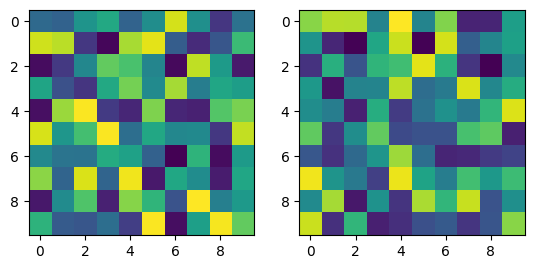

In [78]:
# SOM 초기화
som_map = np.random.rand(map_width, map_height, 2)
print(som_map.shape)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(som_map[:,:,0])
ax2.imshow(som_map[:,:,1])
plt.show()

In [73]:
# SOM 학습
for i in range(num_iterations):
    # 랜덤한 입력 데이터 선택
    input_data = data[np.random.choice(data.shape[0])]
    
    # 가장 유사한 뉴런 찾기
    # 3D som_map과 input_data의 차이^2를 구하여 z축으로 모두 합한 거리
    distances = np.sum((som_map - input_data) ** 2, axis=2) 
    # 위에서 구한 z축의 거리들 중 가장 작은 뉴런
    winner = np.argmin(distances)
    # 3D z축에서 선택된 가장 작은 뉴런을 2D map으로 맵핑한 좌표
    x, y = np.unravel_index(winner, (map_width, map_height))
    
    # 학습률 계산
    learning_rate = lr * (1 - i/num_iterations)
    
    # 뉴런 가중치 업데이트
    for j in range(map_width):
        for k in range(map_height):
            dist = np.sqrt((x-j)**2 + (y-k)**2)
            if dist < 3:
                som_map[j, k] += learning_rate * (input_data - som_map[j, k])

(10, 10, 2)


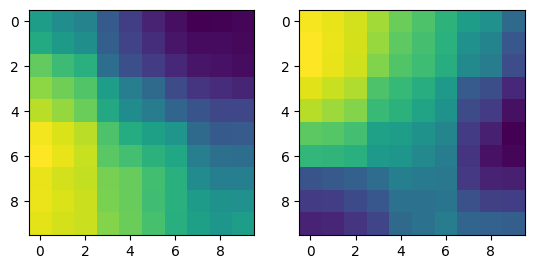

In [74]:
# SOM 시각화
print(som_map.shape)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(som_map[:,:,0])
ax2.imshow(som_map[:,:,1])
plt.show()

### 참고
ChatGPT